# **Ch 0. 초기 설정 및 라이브러리 불러오기**

In [1]:
# 구글 드라이브로부터 데이터 불러오기
# from google.colab import drive
# drive.mount('/content/gdrive')

# 변수 저장/불러오기
import pickle

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 결과 평가
from sklearn.metrics import mean_squared_error, r2_score

# 시각화
import matplotlib.pyplot as plt

In [2]:
# %cd /..
# %cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

In [3]:
# 변수 불러오기
with open("Compressor_pp.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

# **Ch 1. Support Vector Regression (SVR)**

## Ch 1-1. 모델 생성 및 학습


In [4]:
# SVR 불러오기
from sklearn.svm import SVR

In [5]:
# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

In [8]:
# SVM Model Warning 수정
# print(X_scaled_train.shape)
# print(Y_scaled_train.shape)
Y_scaled_train = Y_scaled_train.reshape(-1, )
# print(Y_scaled_train.shape)

In [9]:
# SVR 학습
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# svm_model = SVR(kernel='linear')
svm_model = SVR(kernel='rbf')
svm_model.fit(X_scaled_train, Y_scaled_train)

SVR()

## Ch 1-2. 모델 평가

![MSE](https://github.com/woooky/jinwook/assets/84065529/a212b536-657b-42cc-b41b-8027a3b3b14c)

![R2](https://github.com/woooky/jinwook/assets/84065529/e3ba38b7-9c11-46a3-addc-7893bbcf76fb)

In [10]:
# 학습된 SVR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = svm_model.predict(X_scaled_train)
Y_scaled_test_pred = svm_model.predict(X_scaled_test)

In [11]:
# SVR 학습 성능 평가
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.008097345134709541
R-squared_train: 0.9917172800088481
MSE_test: 0.009780380166919086
R-squared_test: 0.9906882557766584


In [ ]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정
# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)

In [ ]:
# 수정 - min, max array dimension fit

# min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
# print(min_val.shape)
# min_val = min_val.reshape(-1, )
# print(min_val.shape)
# max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
# print(max_val.shape)

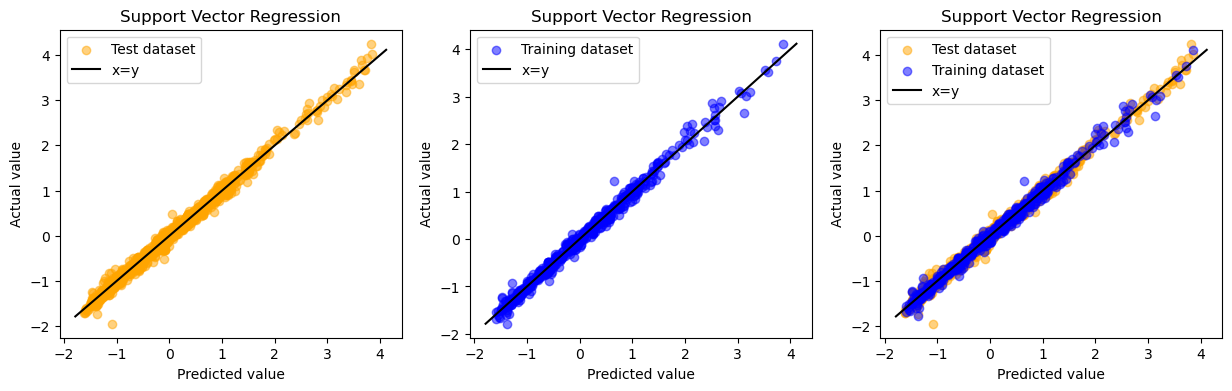

In [12]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
# print(min_val.shape)
min_val = min_val.reshape(-1, )
# print(min_val.shape)

max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
# print(max_val.shape)

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))

# print(min_val.shape)
min_val = min_val.reshape(-1, )
# print(min_val.shape)

max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
# print(max_val.shape)

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
# print(min_val.shape)
min_val = min_val.reshape(-1, )
# print(min_val.shape)

max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
# print(max_val.shape)

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

## Ch 1-3. 임의의 input에 대한 output 예측

In [13]:
# 알고싶은 input
X_unknown=[-15, 3000, -0.1, -20, 2.1, 1.2, 4.0]

# input 스케일링
X_unknown_scaled=scaler_X.transform([X_unknown])

# 예측
y_pred_unknown =  svm_model.predict(X_unknown_scaled)
print(y_pred_unknown)

[-0.33172789]


# **Ch 2. Random Forest Regression (RFR)**


## Ch 2-1. 모델 생성 및 학습

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rfr_model = RandomForestRegressor(n_estimators=5, random_state=42)

rfr_model.fit(X_scaled_train, Y_scaled_train)

RandomForestRegressor(n_estimators=5, random_state=42)

## Ch 2-2. 모델 평가

In [16]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model.predict(X_scaled_test)

In [17]:
Y_scaled_train_pred, Y_scaled_test_pred
print(Y_scaled_train_pred.shape)
print(Y_scaled_test_pred.shape)

(1290,)
(553,)


In [18]:
# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.006292735131977565
R-squared_train: 0.993563203468599
MSE_test: 0.03331669615525584
R-squared_test: 0.968279704094339


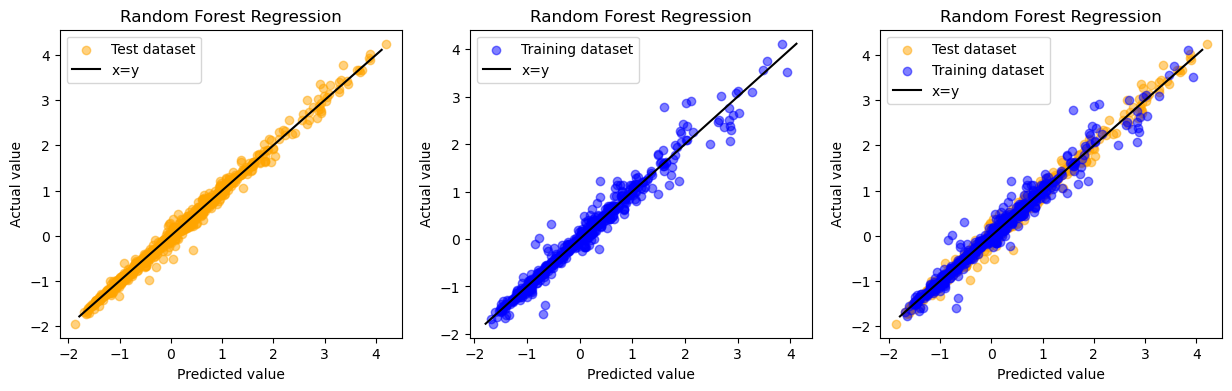

In [19]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

## Ch 2-3. 결정트리 시각화

In [20]:
# 결정트리 시각화
import graphviz
from sklearn import tree

In [21]:
# !pip show scikit-learn

# import sklearn
# print(sklearn.__version__) #1.2.2
print(graphviz.__version__) #0.20.1

0.20.1


In [22]:
# 개별 트리 시각화
for i, estimator in enumerate(rfr_model.estimators_):
    dot_data = tree.export_graphviz(estimator, out_file=None,
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.view(filename=f"tree_{i+1}")

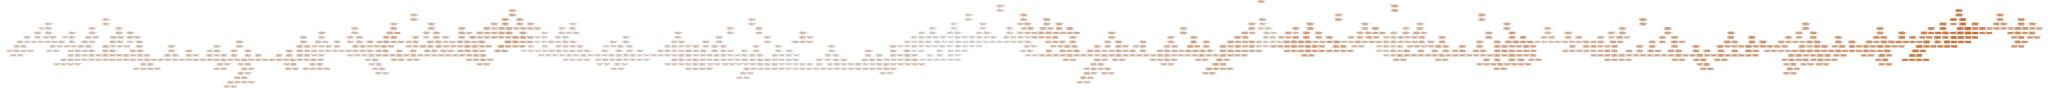

In [23]:
display(graphviz.Source(dot_data))

## Ch 2-4. 임의의 input에 대한 output 예측

In [24]:
# 알고싶은 input
X_unknown=[-15, 3000, -0.1, -20, 2.1, 1.2, 4.0]

# input 스케일링
X_unknown_scaled=scaler_X.transform([X_unknown])

# 예측
y_pred_unknown =  rfr_model.predict(X_unknown_scaled)
print(y_pred_unknown)

[-0.45698507]


# **Ch 3. Deep Neural Network (DNN)**


## Ch 3-1. 모델 생성 및 학습

In [25]:
import tensorflow as tf

In [26]:
print(tf.__version__) # 2.13.0

2.13.0


In [27]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
dnn_model.compile(loss='mean_squared_error', optimizer='adam')

hist=dnn_model.fit(X_scaled_train, Y_scaled_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
41/41 [==============================] - 1s 1ms/step - loss: 0.4662
Epoch 2/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0897
Epoch 3/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 4/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 5/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 6/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 7/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 8/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 9/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 10/50
41/41 [==============================] - 0s 924us/step - loss: 0.0104
Epoch 11/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 12/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 13/50
41/41 [============================

## Ch 3-2. 모델 평가

In [28]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model.predict(X_scaled_test)

18/18 [==============================] - 0s 935us/step


In [29]:
# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.0052699563078472435
R-squared_train: 0.9946093970631932
MSE_test: 0.006625893861851307
R-squared_test: 0.9936915919586381


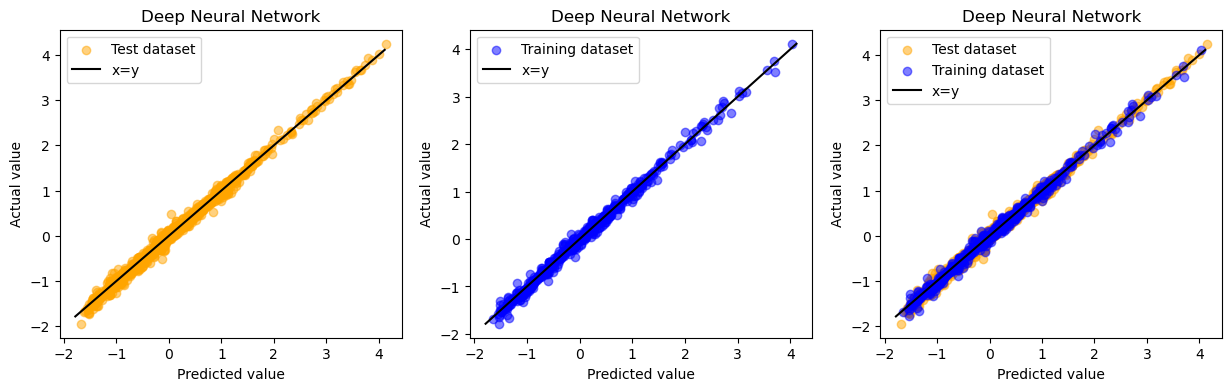

In [30]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

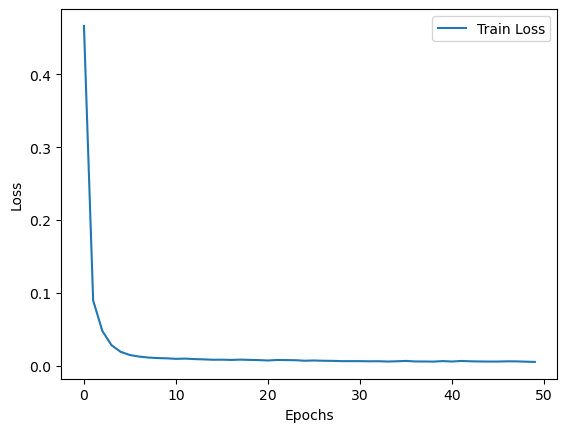

In [31]:
# 손실 그래프
plt.plot(hist.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()